## 패키지 및 데이터 불러오기 

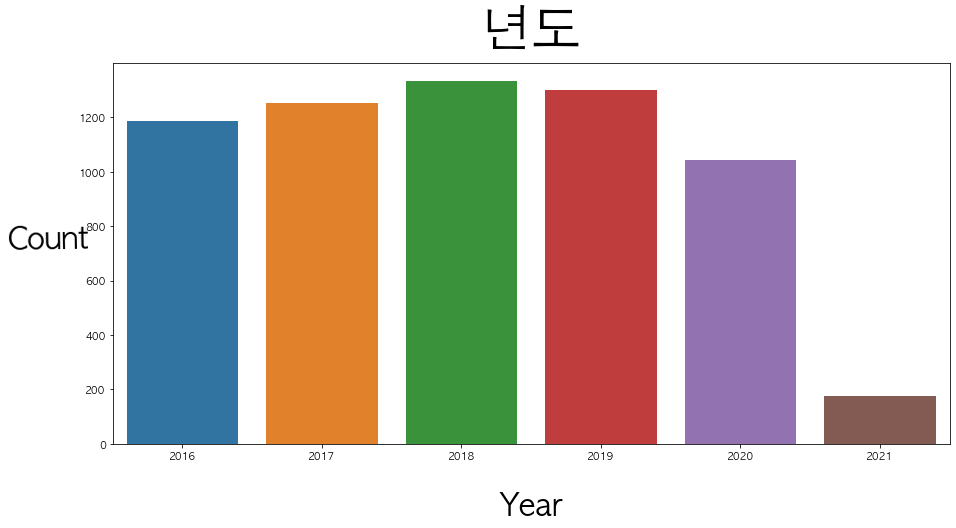

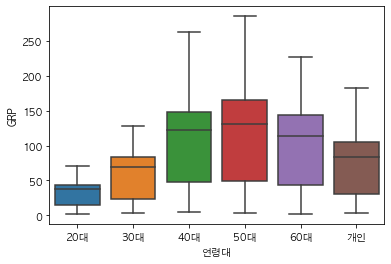

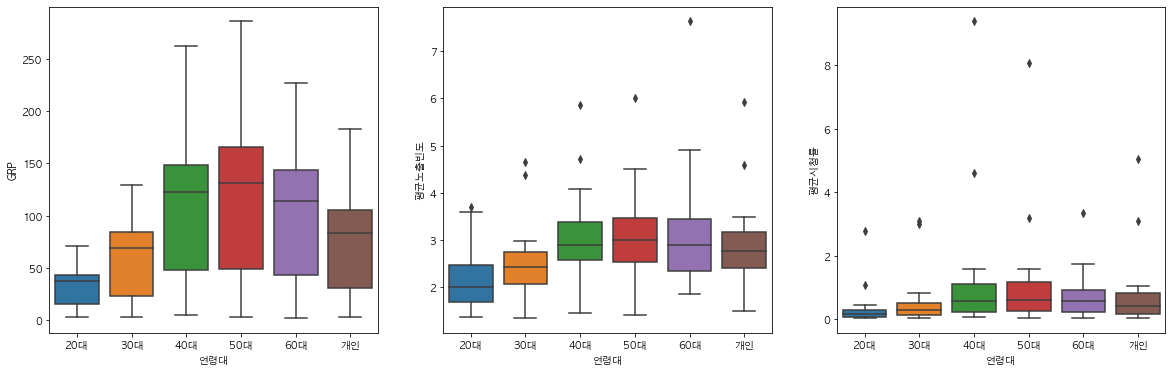

In [10]:
import numpy as np   # numpy 패키지 불러오기 
import pandas as pd  # pandas 패키지 불러오기 
import matplotlib  # matplotlib 패키지 불러오기 
import matplotlib.pyplot as plt # 그래프 시각화를 위한 패키지 불러오기
import seaborn as sns  # seaborn 패키지 불러오기 
import warnings        # warings(경고 메시지 없애주는)패키지 불러오기 
from matplotlib import font_manager, rc  # matplotlib안 한글 깨짐 처리
import platform   # 현재 사용하고 있는 시스템 유형을 알려주는 패키지 
import plotly.express as px  # 더 나은 시각화를 위해 plotly 패키지 불러오기 

# 운영체제에 맞게 폰트 설정
if platform.system() == "Windows":
    # 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False  # 그래프에서 마이너스 기호 표시
warnings.filterwarnings(action='ignore') # 경고 매세지 강제로 없애주는 설정


# dataset load
data = pd.read_csv('./TV_GRPs_by_models.csv')
data = data.drop(['Unnamed: 0'],1)


#preprocessing
# 광고주를 기준으로 광고횟수, GRP, 도달자수, 시청자수를 각각 더함.
idx_ad = data[["Advertiser","GRP","광고횟수","도달자수","시청자수"]].copy().groupby("Advertiser").sum()
# 평균 시청률 
data['평균시청률'] = data['GRP'] / data['광고횟수']
# 평균 노출빈도 구하기 
data['평균노출빈도'] = data['GRP'] / data['도달율 1+']
data['평균노출빈도'].fillna(0, inplace=True)
data['평균노출빈도'].replace(np.inf, 0, inplace=True)
# 광고주와 연령대를 기준으로 그룹화 (평균 기준)
ad_age = data.groupby(["Advertiser", "연령대"]).agg('mean').round(6)[['GRP', '평균시청률', '평균노출빈도']].reset_index()

# 광고주, Product, 연도, 연령대별 광고횟수, GRP, 도달지수, 시청자수
apya = data[["Advertiser","Product","Year","연령대", "광고횟수","GRP","도달자수","시청자수"]].copy().groupby(["Advertiser","Product","Year","연령대"]).mean().reset_index()
apya = apya.astype({"도달자수":int, "시청자수":int})
apya.drop(apya[apya["연령대"]=="개인"].index)

# graph
from Plot import Plot
plot = Plot()

# 연도별 광고 횟수
plot.countplot(data, "년도", "Year")

plot.boxplot(ad_age, '연령대', 'GRP') # inplacesubplot을 설정 X
plot.boxplot(ad_age, '연령대', 'GRP', inplacesubplot=131) # inplacesubplot을 설정 O
plot.boxplot(ad_age, '연령대', '평균노출빈도', inplacesubplot=132)
plot.boxplot(ad_age, '연령대', '평균시청률', inplacesubplot=133)
plot.showplot() # inplacesubplot으로 모아서 한번에 출력 가능